# Project: Investigate a Dataset (No-show-appointments)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions to be analyzed</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset has been collected form Kaggle website in 2016, which contains the information of 100k medical appointments in Brazil. This dataset focuses on the question of whether or not patients show up for their appointment.
Each row on the dataset shows a number of charactristics that line up with the patients' specifications such as gender, age, Hypertension, and diabetes and so on. I will use this information, to help me understand the dataset and raise the most important questions about the sitaution.  

<a id='questions'></a>
## Questions to be analyzed

> <li> Q1: Between shows and no-shows, what is the patient's age?</li><li>Q2: In terms of no-shows, which neighborhoods seems most likely the highest?</li><li>Q3: Between shows and no-shows, what is the appointments' trend?</li><li>Q4: Between shows and no-shows, what is the gender' trend?</li>

## Data Analysis Process
<a id='wrangling'></a>
## Data Wrangling

> Step One: Importing the libraries files that will be used in the analyzation. 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

> Step Two: Load the dataset into the Jupyter notebook.

In [17]:
df = pd.read_csv('noshowappointments.csv')

> Step Three: Return an output of the dataframe. 

In [18]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Step Four: Fix the common issues in the dataset such as missing values, duplicates in the data, and drop duplicates.
Before fixing the dataset, I will check to see if there is any NULL data using info ( ) and isna ( ) 

In [19]:
#Get an overview of the colums data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [20]:
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Notes

> After checking the integration of the dataset, I have noticed some observations that need to be changed to make the dataset better to work with.<li>1- No Null Fields</li><li>2- Patient ID may change to int.</li><li>3- Schedule Day may change to date data type</li><li>4- Appointment Day may change to date data type</li>

> Step Five: Check to see if there is any DUPLICATE data using duplicate ( )

In [21]:
df.duplicated().sum()

0

### Notes

> No duplication. 

<a id='cleaning'></a>
### Data Cleaning
> Data cleaning conatins a lot of steps to make the data orgnaized and easy to understand. 

> Step One: minimize the number of errors and misspellings in the colunms. 


In [22]:
# Cleaning all the headers name from misspelling.
new_headers = ['Patient ID', 'Appointment ID', 'Gender', 'Schedule Day', 'Appointment Day', 'Age', 'Neighborhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS Rreceived', 'No_show']
df.columns = new_headers
df.head()

,Patient ID,Appointment ID,Gender,Schedule Day,Appointment Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS Rreceived,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Step Two: <li>convert the patiend ID from float to int.</li><li> convert Schedule Day to date data type.</li><li>convert Appointment Day to date data type.</li>

In [23]:
# Convert Patient ID
df['Patient ID'] = df['Patient ID'].astype(int)

# Convert Schedule Day
df['Schedule Day'] = pd.to_datetime(df['Schedule Day'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['Schedule Day'].head())

# Convert Appointment Day
df['Appointment Day'] = pd.to_datetime(df['Appointment Day'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['Appointment Day'].head())

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: Schedule Day, dtype: datetime64[ns]
0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: Appointment Day, dtype: datetime64[ns]


In [24]:
#Get an overview of the colums data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Patient ID       110527 non-null  int64         
 1   Appointment ID   110527 non-null  int64         
 2   Gender           110527 non-null  object        
 3   Schedule Day     110527 non-null  datetime64[ns]
 4   Appointment Day  110527 non-null  datetime64[ns]
 5   Age              110527 non-null  int64         
 6   Neighborhood     110527 non-null  object        
 7   Scholarship      110527 non-null  int64         
 8   Hypertension     110527 non-null  int64         
 9   Diabetes         110527 non-null  int64         
 10  Alcoholism       110527 non-null  int64         
 11  Handicap         110527 non-null  int64         
 12  SMS Rreceived    110527 non-null  int64         
 13  No_show          110527 non-null  object        
dtypes: datetime64[ns](2)

> Step Three: Convert some columns into boolean to make the dataest more reprsentative. 

In [25]:
boolean_columns=['Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS Rreceived']
df['Scholarship'] = df['Scholarship'].astype('bool')
df['Hypertension'] = df['Hypertension'].astype('bool')
df['Diabetes'] = df['Diabetes'].astype('bool')
df['Alcoholism'] = df['Alcoholism'].astype('bool')
df['Handicap'] = df['Handicap'].astype('bool')
df['SMS Rreceived'] = df['SMS Rreceived'].astype('bool')
df.head()

,Patient ID,Appointment ID,Gender,Schedule Day,Appointment Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS Rreceived,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,No


In [26]:
#Get an overview of the colums data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Patient ID       110527 non-null  int64         
 1   Appointment ID   110527 non-null  int64         
 2   Gender           110527 non-null  object        
 3   Schedule Day     110527 non-null  datetime64[ns]
 4   Appointment Day  110527 non-null  datetime64[ns]
 5   Age              110527 non-null  int64         
 6   Neighborhood     110527 non-null  object        
 7   Scholarship      110527 non-null  bool          
 8   Hypertension     110527 non-null  bool          
 9   Diabetes         110527 non-null  bool          
 10  Alcoholism       110527 non-null  bool          
 11  Handicap         110527 non-null  bool          
 12  SMS Rreceived    110527 non-null  bool          
 13  No_show          110527 non-null  object        
dtypes: bool(6), datetime

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Between shows and no-shows, what is the patient's age?)

In [27]:
df['No_show'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
# shows query
shows = df.query('No_show == "No"')

In [29]:
# shows query
shows = df.query('No_show == "No"')

# mean of the shows query
shows_df = shows['Age'].mean()
print('The Mean of the shows = ', shows_df)
print('\n')

#No shows query
no_shows = df.query('No_show == "Yes"')

# Mean of the no shows query
no_df = no_shows['Age'].mean()
print('The Mean of the no-shows = ',no_df)
print('\n')

The Mean of the shows =  37.790064393252315


The Mean of the no-shows =  34.31766656212196




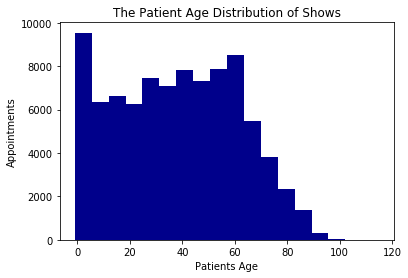

In [30]:
# Getting the plot data 

shows_df = shows['Age']

# The plot of the patients's age
plt.title('The Patient Age Distribution of Shows')
plt.hist(shows_df, bins=18, color='darkblue')
plt.xlabel('Patients Age')
plt.ylabel('Appointments');

> The above plot is the Visualization of the patients age distribution of all shows

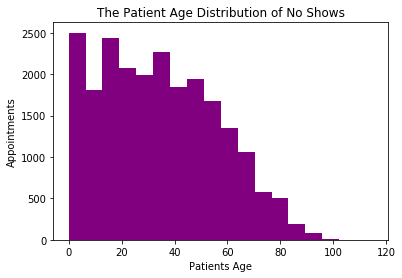

In [31]:
# Getting the plot data 

no_df = no_shows['Age']

# The plot of the patients's age
plt.title('The Patient Age Distribution of No Shows')
plt.hist(no_df, bins=18, color='purple')
plt.xlabel('Patients Age')
plt.ylabel('Appointments');

> The above plot is the Visualization of the patients' age distribution of all no-shows

### Research Question 2  (In terms of no-shows, which neighborhoods seems most likely the highest?)

In [32]:
shows_neighbor_df = shows.groupby("Neighborhood")["No_show"].count().reset_index(name="Total").sort_values("Total", ascending=False)
# shows the five highest neighborhoods of shows
shows_neighbor_df.head()

,Neighborhood,Total
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635


In [33]:
no_shows_neighbor_df = no_shows.groupby("Neighborhood")["No_show"].count().reset_index(name="Total").sort_values("Total", ascending=False)
# shows the five highest neighborhoods of no shows
no_shows_neighbor_df.head()

,Neighborhood,Total
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703


### Research Question 3  (Between shows and no-shows, what is the Appointment Day trend?)

In [34]:
trend_df = df.groupby(["Appointment Day","No_show"])["No_show"].count().reset_index(name="Total")
# The plot data of shows
shows_trend_df = trend_df.query('No_show == "Yes"')
shows_trend_df.groupby("Appointment Day").count()
# the top 10 patients 
shows_trend_df.head(10)

,Appointment Day,No_show,Total
1,2016-04-29,Yes,633
3,2016-05-02,Yes,861
5,2016-05-03,Yes,831
7,2016-05-04,Yes,973
9,2016-05-05,Yes,807
11,2016-05-06,Yes,795
13,2016-05-09,Yes,1019
15,2016-05-10,Yes,992
17,2016-05-11,Yes,885
19,2016-05-12,Yes,837


In [35]:
# The plot data of no shows
no_shows_trend_df = trend_df.query('No_show == "No"')
no_shows_trend_df.groupby("Appointment Day").count()
#the top 10 patients 
no_shows_trend_df.head(10)

,Appointment Day,No_show,Total
0,2016-04-29,No,2602
2,2016-05-02,No,3515
4,2016-05-03,No,3425
6,2016-05-04,No,3195
8,2016-05-05,No,3466
10,2016-05-06,No,3084
12,2016-05-09,No,3501
14,2016-05-10,No,3316
16,2016-05-11,No,3589
18,2016-05-12,No,3557


In [36]:
shows_date_df = shows_trend_df['Appointment Day']
shows_count_df = shows_trend_df['Total']

no_shows_date_df = no_shows_trend_df['Appointment Day']
no_shows_count_df= no_shows_trend_df['Total']

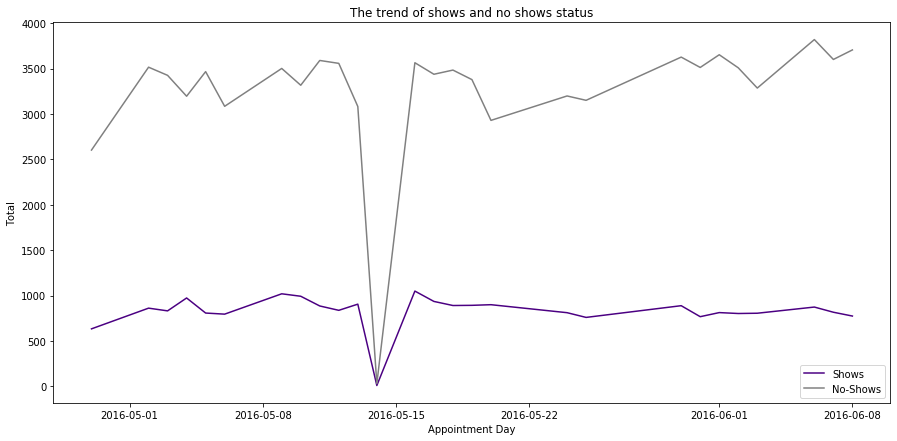

In [37]:
trend_shows, = plt.plot(shows_date_df, shows_count_df, color='Indigo', label='Shows')
trend_no_shows, = plt.plot(no_shows_date_df, no_shows_count_df, color='gray', label='No-Shows')
plt.legend(handles=[trend_shows, trend_no_shows], loc='lower right')
plt.title('The trend of shows and no shows status')
plt.xlabel('Appointment Day')
plt.ylabel('Total');
fig = plt.gcf()
fig.set_size_inches(15,7);
plt.show()

In [38]:
# find the mean of the shows cases 

shows_count_df = shows_trend_df['Total'].mean()
print('The Mean of the total shows cases = ', shows_count_df)
print('\n')

# find the mean of the no-shows cases
no_shows_count_df = no_shows_trend_df['Total'].mean()
print('The Mean of the total no shows cases = ', no_shows_count_df)
print('\n')

The Mean of the total shows cases =  826.6296296296297


The Mean of the total no shows cases =  3266.962962962963




### Research Question 4  (Between shows and no-shows, what is the gender' trend?)

In [39]:
trend_df = df.groupby(["Gender","No_show"])["No_show"].count().reset_index(name="Total")
# The plot data of shows
shows_trend_df = trend_df.query('No_show == "Yes"')
shows_trend_df.groupby("Gender").count()
# the top 10 patients 
shows_trend_df.head()

,Gender,No_show,Total
1,F,Yes,14594
3,M,Yes,7725


In [40]:
# The plot data of no shows
no_shows_trend_df = trend_df.query('No_show == "No"')
no_shows_trend_df.groupby("Gender").count()
#the top 10 patients 
no_shows_trend_df.head()

,Gender,No_show,Total
0,F,No,57246
2,M,No,30962


In [41]:
shows_date_df = shows_trend_df['Gender']
shows_count_df = shows_trend_df['Total']

no_shows_date_df = no_shows_trend_df['Gender']
no_shows_count_df= no_shows_trend_df['Total']

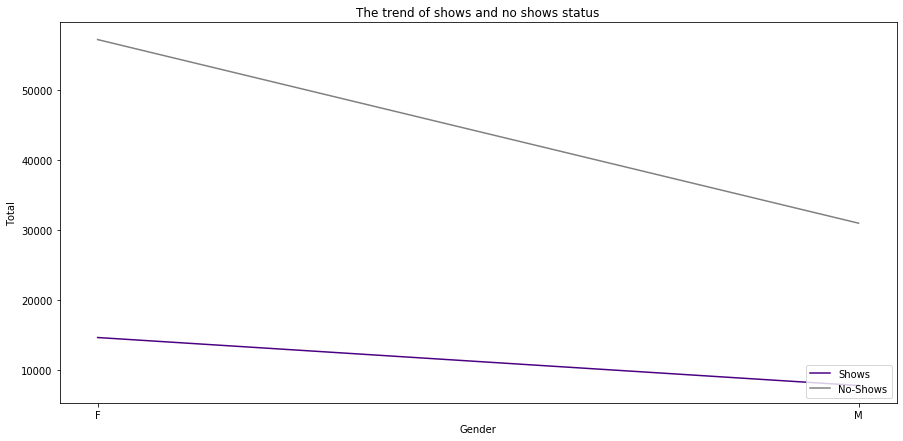

In [42]:
trend_shows, = plt.plot(shows_date_df, shows_count_df, color='Indigo', label='Shows')
trend_no_shows, = plt.plot(no_shows_date_df, no_shows_count_df, color='gray', label='No-Shows')
plt.legend(handles=[trend_shows, trend_no_shows], loc='lower right')
plt.title('The trend of shows and no shows status')
plt.xlabel('Gender')
plt.ylabel('Total');
fig = plt.gcf()
fig.set_size_inches(15,7);
plt.show()

In [43]:
# find the mean of the shows cases 

shows_count_df = shows_trend_df['Total'].mean()
print('The Mean of the total shows cases = ', shows_count_df)
print('\n')

# find the mean of the no-shows cases
no_shows_count_df = no_shows_trend_df['Total'].mean()
print('The Mean of the total no shows cases = ', no_shows_count_df)
print('\n')

The Mean of the total shows cases =  11159.5


The Mean of the total no shows cases =  44104.0




<a id='conclusions'></a>
## Conclusions

> To sum up, the above analyzation has shown the no shows seem to higher in all the aspects which will be specified later in the findings section.
## Findings
Q1: Between shows and no-shows, what is the patient's age?
> The mean age of the show part was almost 38 years old. On the other hand, the mean age of the no shows part was 34 years old. This two numbers are close which make the age factore less likly to be one of the most important factors that make the people not show to the appointmnets. 

Q2: In terms of no-shows, which neighborhoods seems most likely the highest?
> This test was conducted to see the relationship between the neighborhood and no-show case. as the two tables have shown above that JARDIM CAMBURI and MARIA ORTIZ are the top two neighborhood in both cases the show and no-show. This lead to making neighborhood factor less likely to be one of the most important factors that make the people not show to the appointments. As well as, this case need to conduct further investigation to find out the more about the situation.

Q3: Between shows and no-shows, what is the appointments' trend?
> As the graph shows, the trend of the no-shows cases seems to be much higher than the show cases. Furthermore, the deep investigation of this factor has shown that the mean of the shows cases is almost 827, while the mean of the no shows cases is 3267. This big difference between this two number has made the appointments day factor one of the highest factors that may has a an affect on making the people not show to the appointments.

Q4: Between shows and no-shows, what is the gender' trend?
> This is a very similar case to the previous one, the only different that the factor used is the gender factor rather than the appointment day factor. Yet, the the result are vary from men and female and show and no-show cases. to begin with, it shows that men are less likely in both cases and female are more likely. We can see from the mean that of shows cases from both men and female is 11159.5 and the no shows cases form bothe gender is 44104.0.     

Summary
> At the end of my analyzation, I think that there are a lot of factors that impacted the people ability to show up for their appointments. As a result, The appointment day seems to be the most likely influenced factor. it might to be because thier appointments could be in holidays or weekends of any other day. this dataset need more investigations to reach the final result of the exact reasons of the situation.

## Limitations
> The dataset used is limited to the timefram it was gathered, which makes it hard to conduct the final findings and result on other similar datasets or larger population.
> This data analyzation need more deep investigation to reais more question about the case and apply more statistical tests to find more accurate reasons.